
# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [1]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
# Load the file as a dataframe 
train_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/train.csv"
movies_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/moviesData.csv"
df = pd.read_csv(train_url)
movies = pd.read_csv(movies_url)

In [3]:
# Print the first ten rows of df
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [4]:
# Print the first five rows of MonthlyRate
df.MonthlyRate.head(5)

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [5]:
# Find the details of MonthlyRate 
df.MonthlyRate.describe()

count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [6]:
# Check for missing values 
missing = df.isna().sum().sum() > 0
print("Missing values = {}".format(missing))

# Drop the missing values 
if missing:
  print("Dropping...")
  df = df.dropna()

# Print the size of df after dropping 
print(df.shape)

Missing values = False
(1028, 34)


### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [7]:
# Add a column named MonthRateNew 
df['MonthRateNew'] = (df.MonthlyRate - df.MonthlyRate.mean()) / df.MonthlyRate.std()
df['MonthRateNew'].head()

0    0.742749
1    1.512813
2   -1.680795
3    1.264827
4    0.338849
Name: MonthRateNew, dtype: float64

### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [8]:
# Check for missing values 
print("# of Missing Values = {}".format(movies.isna().sum().sum()))

rows_missing = 0
for i in range(len(movies)):
  if movies.iloc[i].isnull().sum():
    rows_missing += 1

print("# of Rows having missing values = {}".format(rows_missing) )

# Drop the missing values 

movies_drop = movies.dropna()
print("size after dropping = {}".format(movies_drop.shape))

# Replace the missing values 
# You can use SimpleImputer of sklearn for this

print()
movies_numeric = movies.select_dtypes(include = np.number)
movies_non_numeric = movies.select_dtypes(exclude = np.number)

movies_numeric = movies_numeric.fillna(movies_numeric.mean())
movies_non_numeric = movies_non_numeric.fillna(movies_non_numeric.mode().iloc[0])  # Multiple modes possible

movies_fill = pd.concat([movies_numeric, movies_non_numeric], axis=1)

print("size after filling = {}".format(movies_fill.shape))
print("# of Missing Values = {}".format(movies_fill.isna().sum().sum()))

# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(strategy="most_frequent")
# movies2 = pd.DataFrame(imp.fit_transform(movies))

# print("size after filling = {}".format(movies2.shape))
# print("# of Missing Values = {}".format(movies2.isna().sum().sum()))

# of Missing Values = 73
# of Rows having missing values = 28
size after dropping = (572, 31)

size after filling = (600, 31)
# of Missing Values = 0


---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

Most of people have Age between 30 to 35 years


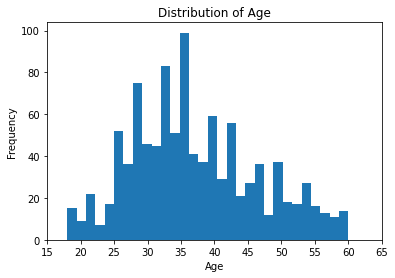

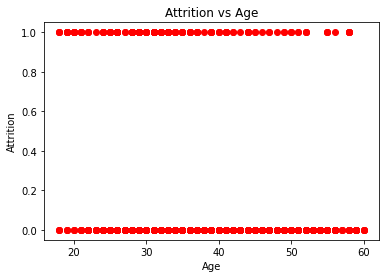

People of age more than 50 years are less likely to leave the company


In [9]:
# Plot and modify the histogram of Age

# plt.hist(df['Age'],width = 4)

print("Most of people have Age between 30 to 35 years")

plt.hist(df['Age'], bins = 30)

plt.title("Distribution of Age")
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.xticks(range(15, 70, 5))
plt.show()

# Draw a scatter plot between Age and Attrition

plt.scatter(df['Age'], df['Attrition'], color='r')
plt.title("Attrition vs Age")
plt.ylabel("Attrition")
plt.xlabel("Age")
plt.show()

print("People of age more than 50 years are less likely to leave the company")

### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

0    856
1    172
Name: Attrition, dtype: int64



Text(0.5, 1.0, 'Attrition Count')

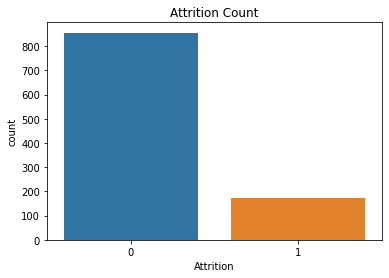

In [10]:
# Get a series of counts of values of Attrition
print(df['Attrition'].value_counts())

print()
# Draw a countplot for Attrition 
# You may use countplot of seaborn for this 
sns.countplot(df['Attrition'])
plt.title("Attrition Count")


### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

Category "Travel_Rarely" has highest number of people


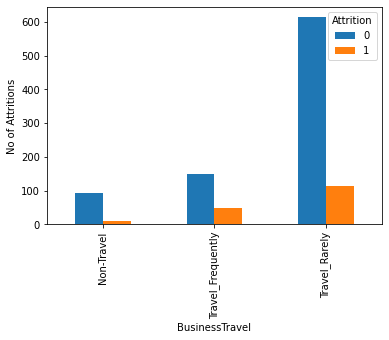

In [11]:
# Draw a cross tab of Attrition and BusinessTravel 
# You may use crosstab of pandas for this 
ct1 = pd.crosstab(df.BusinessTravel, df.Attrition)

ct1.plot(kind = 'bar')
plt.ylabel("No of Attritions")

print("Category \"Travel_Rarely\" has highest number of people")

### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

Text(0, 0.5, 'No of Attritions')

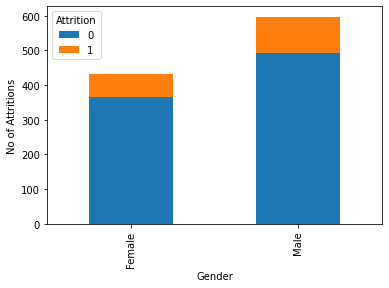

In [12]:
# Draw a stacked bar chart between Attrition and Gender 
ct2 = pd.crosstab(df.Gender, df.Attrition)

ct2.plot(kind = 'bar', stacked = True)
plt.ylabel("No of Attritions")

Text(0, 0.5, 'Proportion of Attrition')

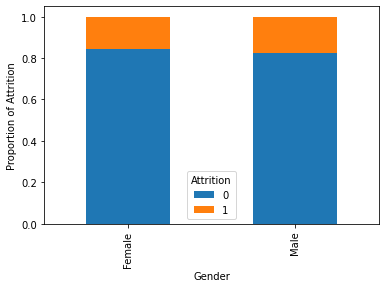

In [13]:
ct3 = pd.crosstab(df.Gender, df.Attrition)

ct3.div(ct3.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

plt.ylabel('Proportion of Attrition')

### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

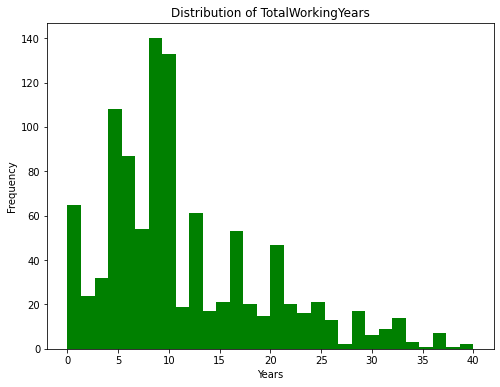

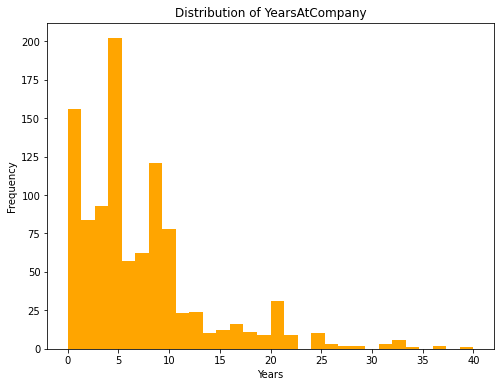

values in YearsAtCompany are Right Skewed


In [14]:
# Draw a histogram of TotalWorkingYears with 30 bins
plt.figure(figsize = (8, 6))
plt.hist(df['TotalWorkingYears'], bins = 30, color = 'g')
plt.title("Distribution of TotalWorkingYears")
plt.ylabel("Frequency")
plt.xlabel("Years")
plt.show()

# Draw a histogram of YearsAtCompany
plt.figure(figsize = (8, 6))
plt.hist(df['YearsAtCompany'], bins = 30, color = 'orange')
plt.title("Distribution of YearsAtCompany")
plt.ylabel("Frequency")
plt.xlabel("Years")
plt.show()

print("values in YearsAtCompany are Right Skewed")

### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


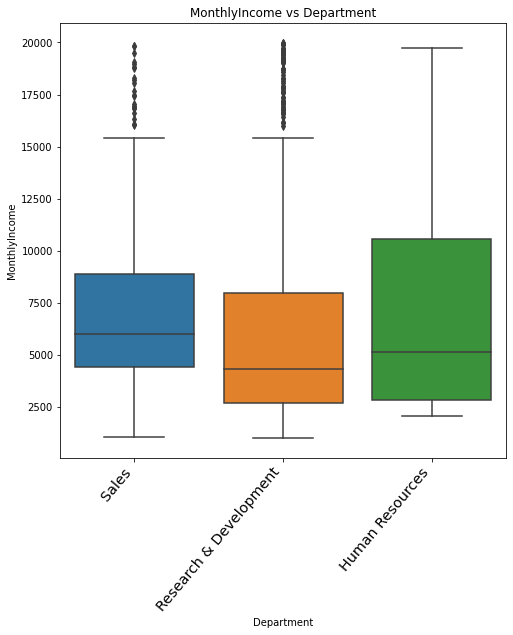

Yes, There are outliers


In [15]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 

plt.figure(figsize = (8, 8))

chart = sns.boxplot('Department', 'MonthlyIncome', data = df)
plt.title("MonthlyIncome vs Department")
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation = 50, 
    horizontalalignment = 'right',
    fontweight = 'light',
    fontsize = 'x-large'
)
plt.show()

print("Yes, There are outliers")

### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

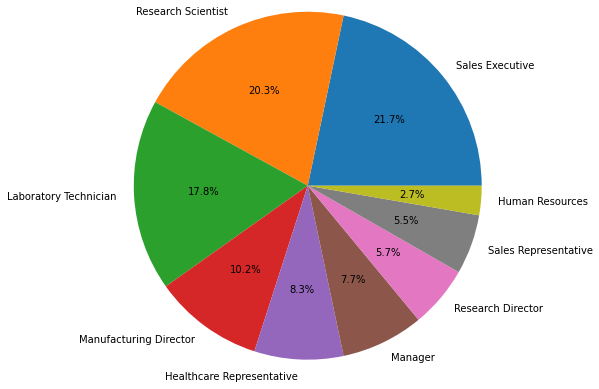

Research Scientist has highest number of persons


In [16]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 
JobRole_count = df.JobRole.value_counts()

plt.pie(JobRole_count, labels = JobRole_count.index.tolist(), autopct = '%1.1f%%', radius = 2)
plt.show()

print("Research Scientist has highest number of persons")

In [0]:
# 